* The model was built without using any preprocessing technique under the initial model with variables 'Games Played' and 'Field Goals Made'
* The model was built without using any preprocessing technique under the initial model with all the variables

### 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import Normalize, ListedColormap
from sklearn.metrics import roc_curve, roc_auc_score

### 2) Importing Dataset

In [2]:
df = pd.read_csv('nba_rookie_data.csv')
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [3]:
# drop unusual column
df = df.drop(['Name'], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Games Played         1340 non-null   int64  
 1   Minutes Played       1340 non-null   float64
 2   Points Per Game      1340 non-null   float64
 3   Field Goals Made     1340 non-null   float64
 4   Field Goal Attempts  1340 non-null   float64
 5   Field Goal Percent   1340 non-null   float64
 6   3 Point Made         1340 non-null   float64
 7   3 Point Attempt      1340 non-null   float64
 8   3 Point Percent      1329 non-null   float64
 9   Free Throw Made      1340 non-null   float64
 10  Free Throw Attempts  1340 non-null   float64
 11  Free Throw Percent   1340 non-null   float64
 12  Offensive Rebounds   1340 non-null   float64
 13  Defensive Rebounds   1340 non-null   float64
 14  Rebounds             1340 non-null   float64
 15  Assists              1340 non-null   f

* Missing values handling

In [5]:
missing_values = df.isna()

# Calculate the count of missing values in each column
missing_count = missing_values.sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_count / len(df)) * 100

# Create a summary DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_count, 'Missing Percentage': missing_percentage})

# Print or display the summary
print(missing_info)


                     Missing Values  Missing Percentage
Games Played                      0            0.000000
Minutes Played                    0            0.000000
Points Per Game                   0            0.000000
Field Goals Made                  0            0.000000
Field Goal Attempts               0            0.000000
Field Goal Percent                0            0.000000
3 Point Made                      0            0.000000
3 Point Attempt                   0            0.000000
3 Point Percent                  11            0.820896
Free Throw Made                   0            0.000000
Free Throw Attempts               0            0.000000
Free Throw Percent                0            0.000000
Offensive Rebounds                0            0.000000
Defensive Rebounds                0            0.000000
Rebounds                          0            0.000000
Assists                           0            0.000000
Steals                            0            0

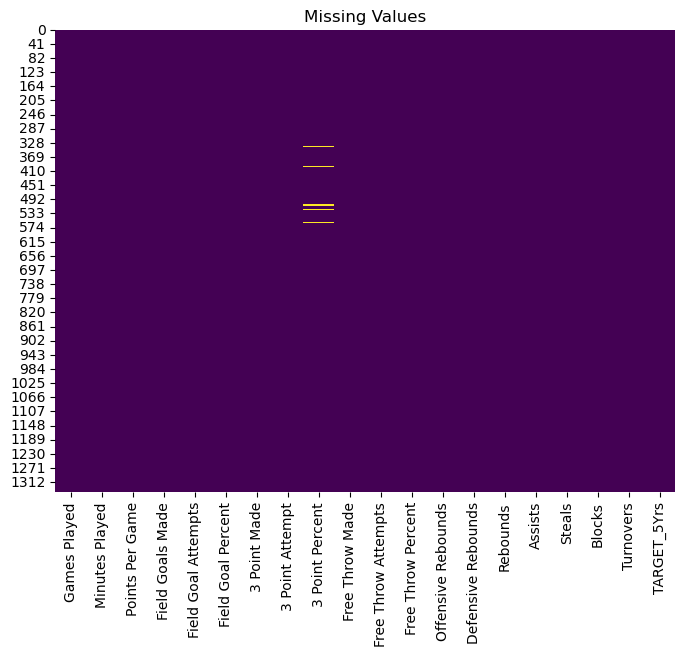

In [6]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

In [7]:
# remove missing value with entire row
data = df.dropna(how='any')

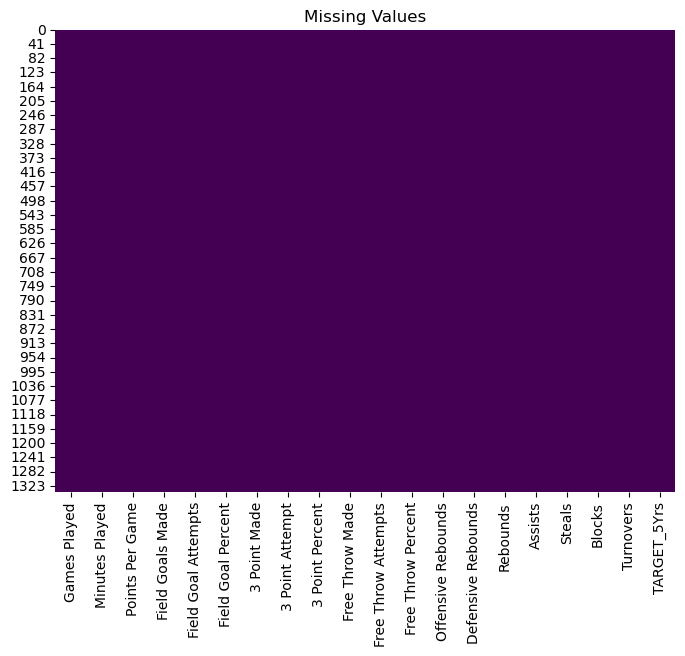

In [8]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

* Correlation Analysis

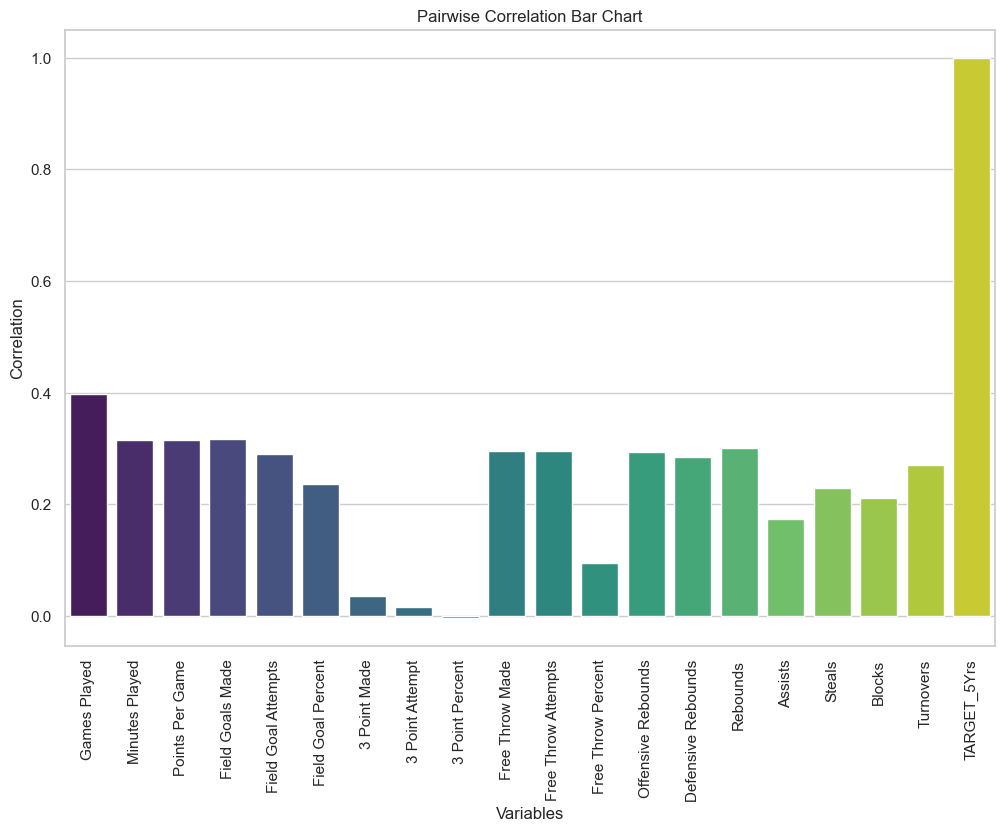

In [9]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a bar chart to display the correlations
plt.figure(figsize=(12, 8))  # Set the figure size
sns.set(style="whitegrid")  # Set the style of the chart

# Create a bar chart using a horizontal barplot
sns.barplot(x=corr_matrix.index, y=corr_matrix["TARGET_5Yrs"], palette="viridis")

# Customize the chart
plt.title("Pairwise Correlation Bar Chart")
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [10]:
corr_matrix.iloc[:,19]

Games Played           0.397783
Minutes Played         0.316031
Points Per Game        0.314632
Field Goals Made       0.316393
Field Goal Attempts    0.290684
Field Goal Percent     0.235587
3 Point Made           0.035025
3 Point Attempt        0.016151
3 Point Percent       -0.003411
Free Throw Made        0.295546
Free Throw Attempts    0.296018
Free Throw Percent     0.095621
Offensive Rebounds     0.294637
Defensive Rebounds     0.285673
Rebounds               0.300491
Assists                0.173788
Steals                 0.228931
Blocks                 0.211751
Turnovers              0.270767
TARGET_5Yrs            1.000000
Name: TARGET_5Yrs, dtype: float64

Let's take "Games Played" and "Field Goals Made" variables which have the highest correlation

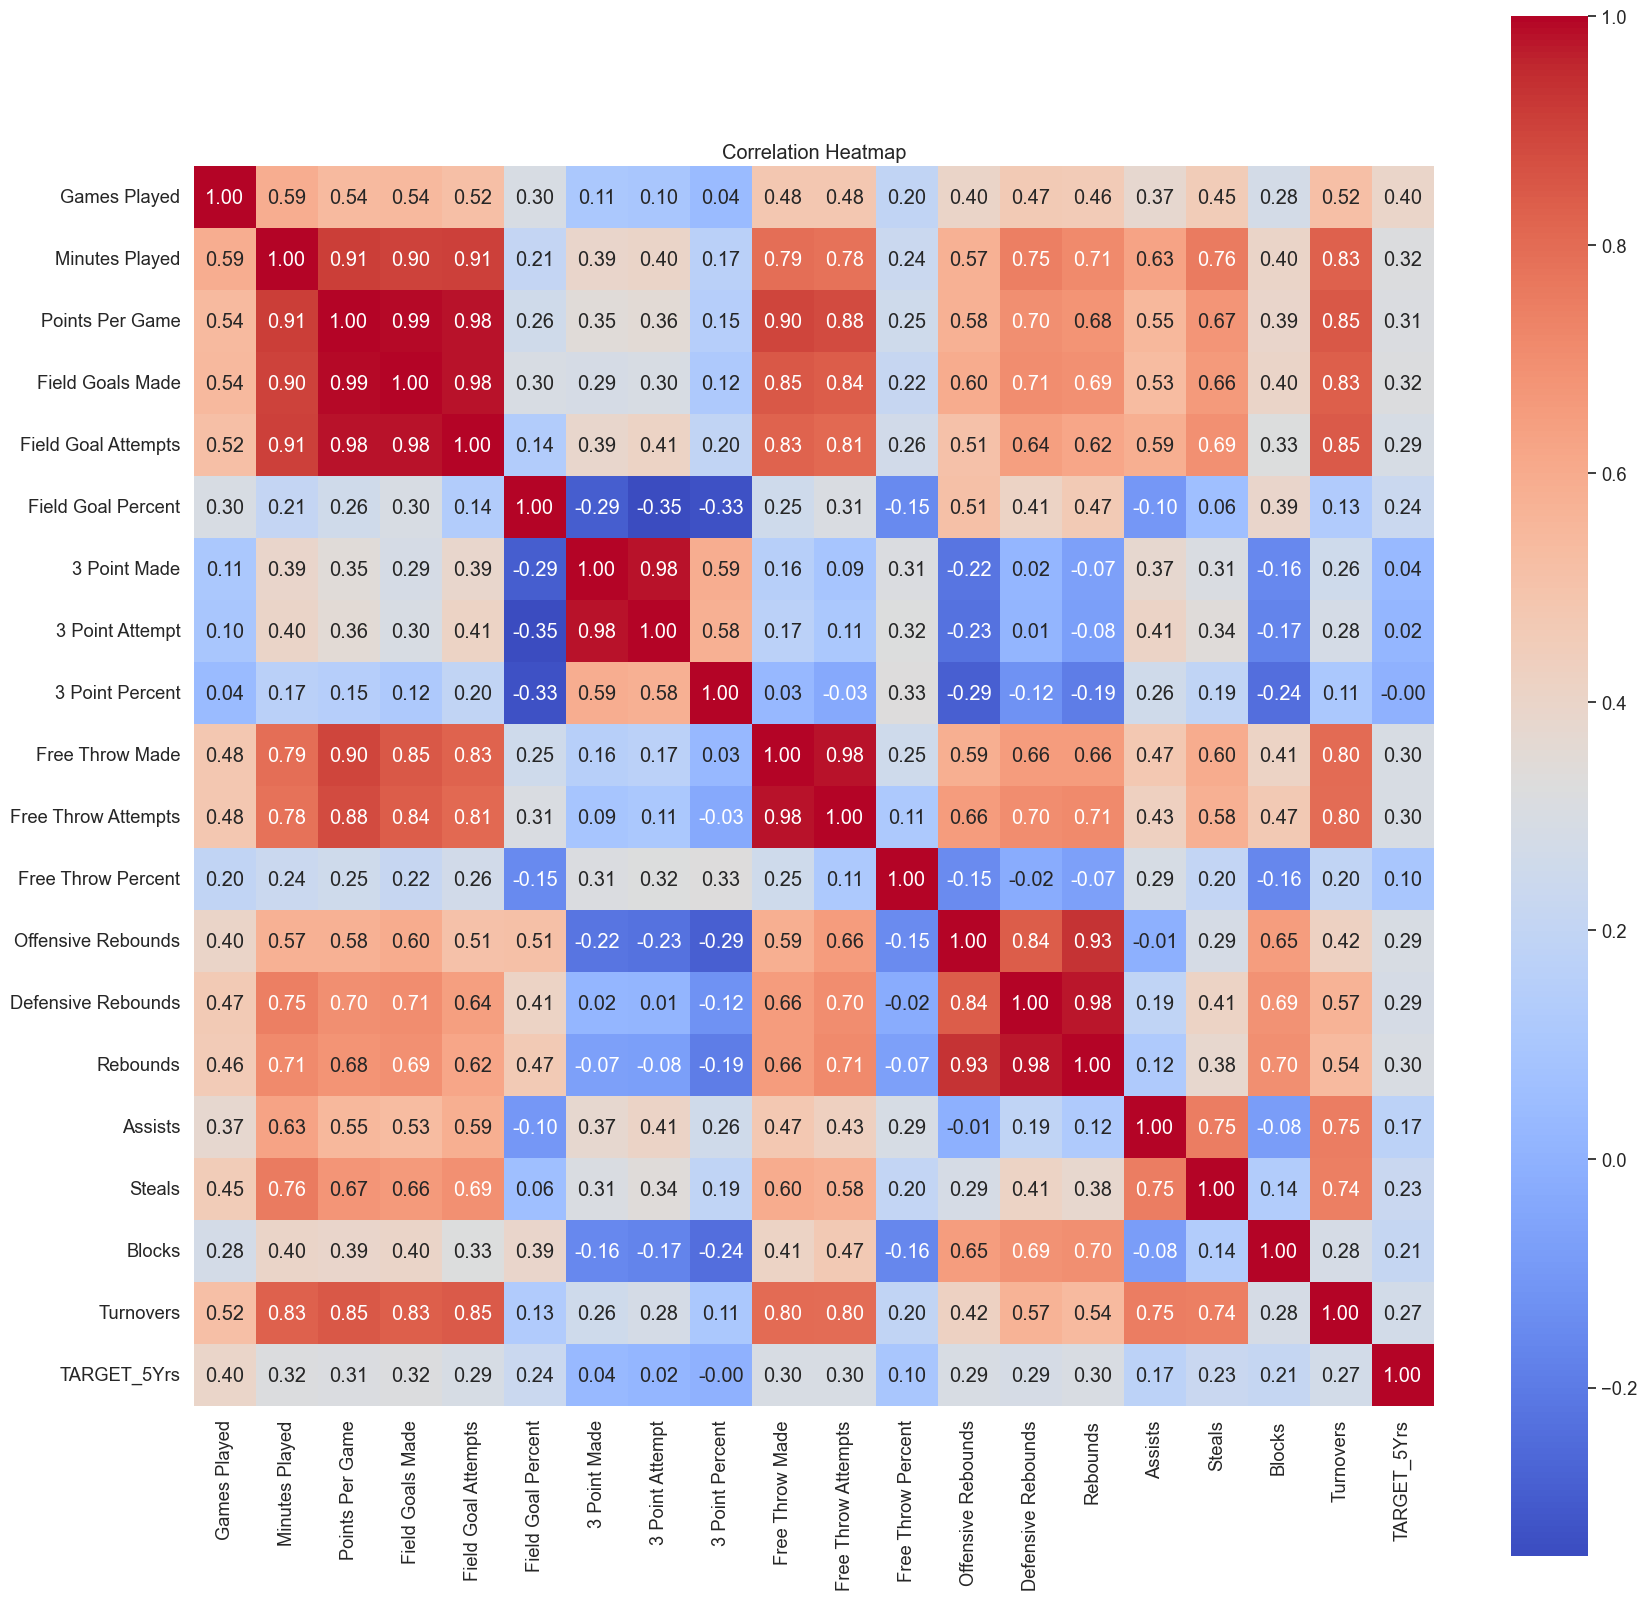

In [40]:
# Create a heatmap
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

### 3) Modeling

* Define independent and dependent variables

In [11]:
X = data.iloc[:,[0,3]].values
y = data.iloc[:,19].values

* Using all the variables

In [ ]:
""""
X = data.iloc[:,0:19].values
y = data.iloc[:,19].values
""""

* Split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/4, random_state=0)

#### 3.1) Logistic Regression Model

In [13]:
# create the model and fit
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
# predict the test data response variable
y_predicted_lr = lr.predict(X_test)

In [16]:
# predict the probability value of response variable
y_probs_lr = lr.predict_proba(X_test)[:,1]

* Evaluating the model

In [17]:
# output the accuracy score
print('Our Accuracy is %.2f' % lr.score(X_test, y_test))

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'% (X_test.shape[0], (y_test != lr.predict(X_test)).sum()))

Our Accuracy is 0.71
Number of mislabeled points out of a total 333 points : 98


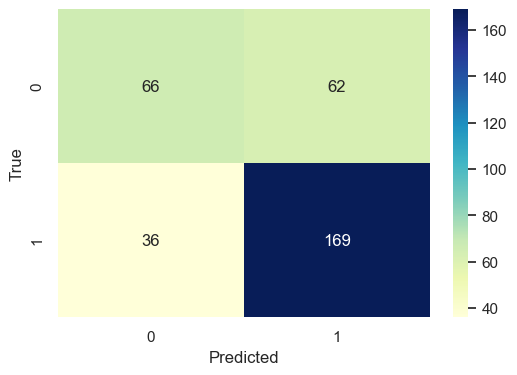

In [18]:
cm = confusion_matrix(y_test,y_predicted_lr)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

* 1: if career length >= 5 yrs 
* 0: if career length < 5 yrs

In [19]:
# confusion matrix
print(classification_report(y_test, y_predicted_lr))

              precision    recall  f1-score   support

           0       0.65      0.52      0.57       128
           1       0.73      0.82      0.78       205

    accuracy                           0.71       333
   macro avg       0.69      0.67      0.67       333
weighted avg       0.70      0.71      0.70       333



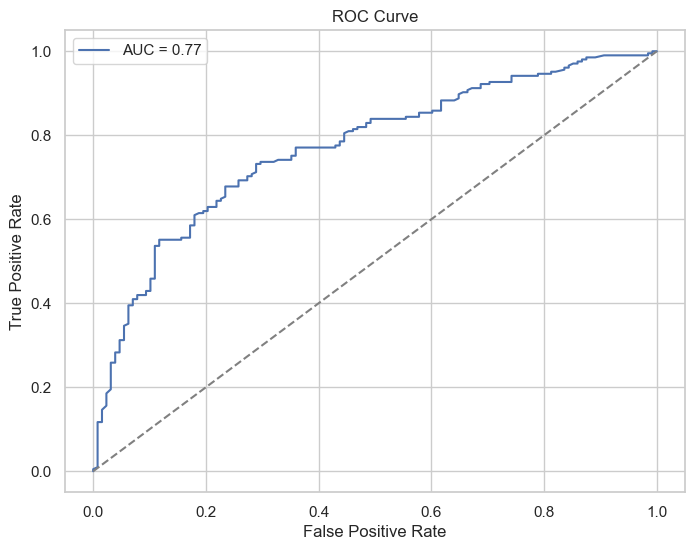

In [20]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lr)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs_lr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

* Visualize the model

Misclassified Points:
 [[42.   3.2]
 [73.   4.7]
 [38.   1.6]
 [45.   1.1]
 [75.   1.5]
 [64.   1.5]
 [53.   1.3]
 [63.   1.4]
 [54.   1.3]
 [41.   1.5]
 [55.   1.8]
 [58.   1.7]
 [42.   1.1]
 [36.   0.8]
 [49.   1.2]
 [50.   2. ]
 [70.   2.7]
 [18.   0.4]
 [79.   1.8]
 [61.   1.6]
 [71.   2.9]
 [82.   2.1]
 [63.   2.6]
 [38.   0.7]
 [82.   7.5]
 [39.   0.7]
 [41.   1.2]
 [82.   3.7]
 [43.   1.9]
 [67.   2.6]
 [19.   1. ]
 [46.   1.8]
 [65.   1.9]
 [35.   0.5]
 [78.   2.6]
 [35.   0.9]
 [79.   2.7]
 [62.   1.8]
 [68.   1. ]
 [72.   2.6]
 [39.   2.1]
 [60.   1. ]
 [44.   1. ]
 [82.   2.1]
 [46.   2.1]
 [47.   0.7]
 [33.   2.4]
 [64.   2.1]
 [38.   1.3]
 [61.   3.2]
 [62.   1.7]
 [76.   2. ]
 [65.   2.1]
 [42.   1.3]
 [65.   1. ]
 [62.   1.8]
 [80.   4.9]
 [65.   2.9]
 [45.   2.6]
 [67.   2. ]
 [57.   1.6]
 [52.   1.5]
 [82.   3.1]
 [71.   2. ]
 [47.   0.9]
 [77.   3.7]
 [68.   2.1]
 [74.   2. ]
 [81.   2.7]
 [55.   1.9]
 [43.   1. ]
 [79.   2.6]
 [32.   1.3]
 [53.   2.1]
 [66.   2.9]
 [

Text(0, 0.5, 'Field Goals Made')

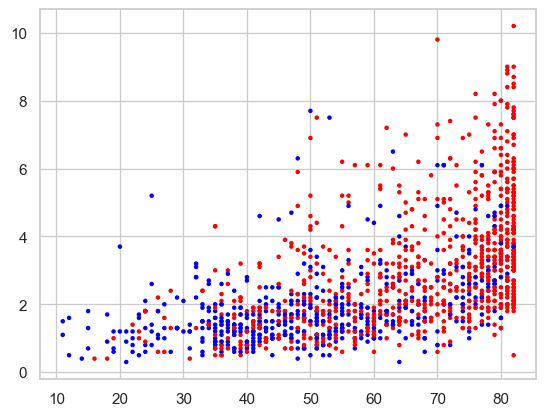

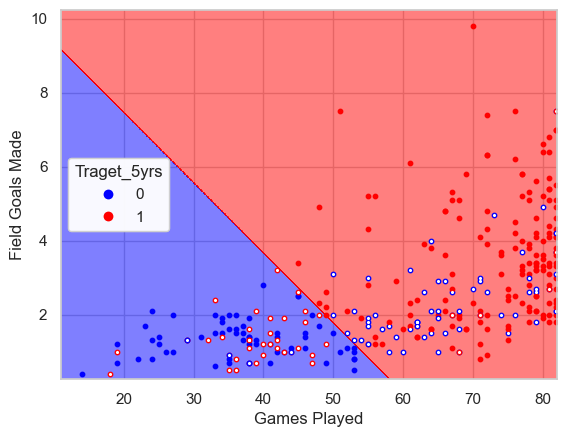

In [21]:
nm = Normalize(vmin = 0, vmax = 1)
cm = ListedColormap(['blue', 'red'])


fig0, ax0 = plt.subplots()

scatter1 = ax0.scatter(X[:, 0], X[:, 1], c=y, cmap=cm, 
    norm = nm, s = 5)

# visualise the model
fig, ax = plt.subplots()

# need to set up a mesh to plot the contour of the model
x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05

h = 0.01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
	np.arange(y_min, y_max, h))

# model predicts every point in the mesh 
# and reshapes the array for plotting
Z = lr.predict(np.column_stack([xx.ravel(), 
	yy.ravel()]))
Z = Z.reshape(xx.shape)

# set up the color and symbol encoding
nm = Normalize(vmin = 0, vmax = 1)
cm = ListedColormap(['blue', 'red'])
m = ['o', 's']

# contour plot of the model
ax.contourf(xx, yy, Z, cmap = cm, norm = nm, alpha=0.5)

# plot the data
for i in range(len(X_test)):
	ax.scatter(X_test[i,0], X_test[i,1], 
		marker = 'o', 
		c = y_test[i], cmap = cm, norm = nm, s = 10)


# find the misclassified points
mis_ind = np.where(y_test != lr.predict(X_test))[0]
print('Misclassified Points:\n', X_test[mis_ind], 
	y_test[mis_ind])

# plot the misclassified points
ax.scatter(X_test[mis_ind,0], X_test[mis_ind,1], 
		marker = '*', color = 'white', s = 2)


legend1 = ax.legend(*scatter1.legend_elements(),
                    loc="center left", title="Traget_5yrs")


ax.add_artist(legend1)


ax.set_xlabel('Games Played')
ax.set_ylabel('Field Goals Made')

#### 3.2) Naive Bayes 

In [23]:
# create the model and fit
nb =  GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
# predict the test data response variable
y_predicted_nb = nb.predict(X_test)

In [25]:
# predict the probability value of response variable
y_probs_nb = nb.predict_proba(X_test)[:,1]

* Evaluating the model

In [26]:
# output the accuracy score
print('Our Accuracy is %.2f' % nb.score(X_test, y_test))

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'% (X_test.shape[0], (y_test != nb.predict(X_test)).sum()))

Our Accuracy is 0.72
Number of mislabeled points out of a total 333 points : 94


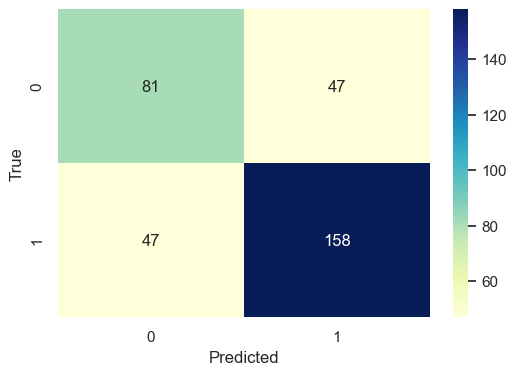

In [27]:
cm_nb = confusion_matrix(y_test,y_predicted_nb)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [28]:
# confusion matrix
print(classification_report(y_test, y_predicted_nb))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       128
           1       0.77      0.77      0.77       205

    accuracy                           0.72       333
   macro avg       0.70      0.70      0.70       333
weighted avg       0.72      0.72      0.72       333



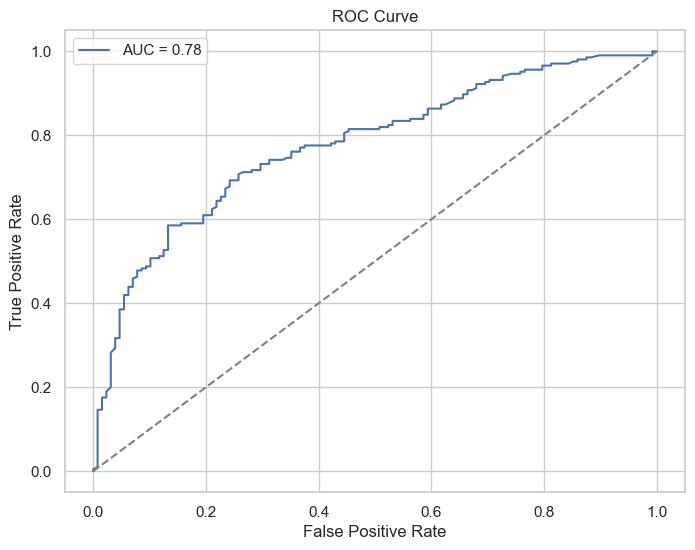

In [29]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_nb)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs_nb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Misclassified Points:
 [[42.   3.2]
 [73.   4.7]
 [38.   1.6]
 [45.   1.1]
 [75.   1.5]
 [64.   1.5]
 [63.   1.4]
 [41.   1.5]
 [49.   2.2]
 [42.   1.1]
 [36.   0.8]
 [49.   1.2]
 [70.   2.7]
 [18.   0.4]
 [79.   1.8]
 [61.   1.6]
 [71.   2.9]
 [82.   2.1]
 [63.   2.6]
 [38.   0.7]
 [49.   2.6]
 [82.   7.5]
 [39.   0.7]
 [41.   1.2]
 [82.   3.7]
 [43.   1.9]
 [67.   2.6]
 [19.   1. ]
 [46.   1.8]
 [65.   1.9]
 [35.   0.5]
 [78.   2.6]
 [35.   0.9]
 [54.   1.9]
 [79.   2.7]
 [62.   1.8]
 [68.   1. ]
 [72.   2.6]
 [39.   2.1]
 [44.   1. ]
 [48.   2.3]
 [82.   2.1]
 [46.   2.1]
 [47.   0.7]
 [33.   2.4]
 [64.   2.1]
 [38.   1.3]
 [61.   3.2]
 [62.   1.7]
 [76.   2. ]
 [65.   2.1]
 [42.   1.3]
 [65.   1. ]
 [62.   1.8]
 [57.   1.2]
 [80.   4.9]
 [65.   2.9]
 [45.   2.6]
 [58.   1.8]
 [67.   2. ]
 [82.   3.1]
 [71.   2. ]
 [47.   0.9]
 [55.   1.2]
 [77.   3.7]
 [68.   2.1]
 [74.   2. ]
 [81.   2.7]
 [52.   2.1]
 [43.   1. ]
 [79.   2.6]
 [32.   1.3]
 [66.   2.9]
 [55.   3. ]
 [56.   1.4]
 [

Text(0, 0.5, 'Field Goals Made')

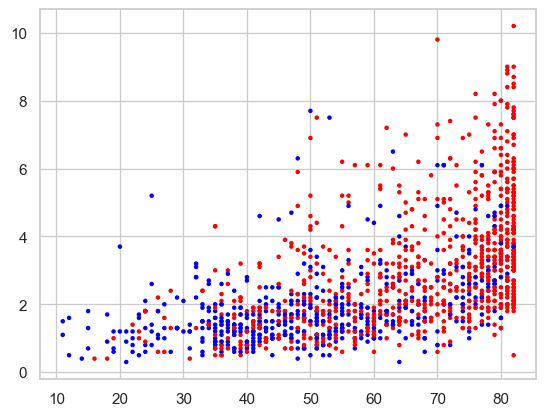

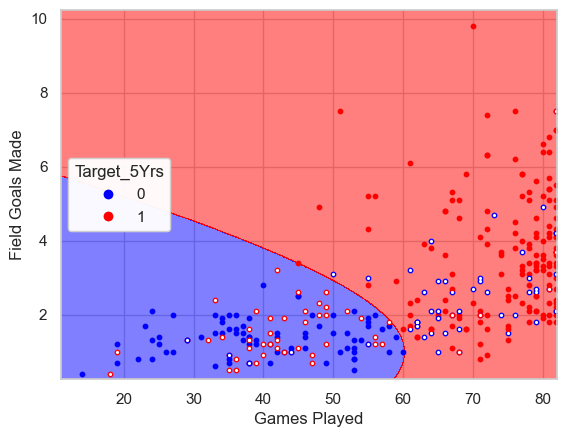

In [30]:
nm = Normalize(vmin = 0, vmax = 1)
cm = ListedColormap(['blue', 'red'])


fig0, ax0 = plt.subplots()

scatter1 = ax0.scatter(X[:, 0], X[:, 1], c=y, cmap=cm, 
    norm = nm, s = 5)

# visualise the model
fig, ax = plt.subplots()

# need to set up a mesh to plot the contour of the model
x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05

h = 0.01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
	np.arange(y_min, y_max, h))

# model predicts every point in the mesh 
# and reshapes the array for plotting
Z = nb.predict(np.column_stack([xx.ravel(), 
	yy.ravel()]))
Z = Z.reshape(xx.shape)

# set up the color and symbol encoding
nm = Normalize(vmin = 0, vmax = 1)
cm = ListedColormap(['blue', 'red'])
m = ['o', 's']

# contour plot of the model
ax.contourf(xx, yy, Z, cmap = cm, norm = nm, alpha=0.5)

# plot the data
for i in range(len(X_test)):
	ax.scatter(X_test[i,0], X_test[i,1], 
		marker = 'o', 
		c = y_test[i], cmap = cm, norm = nm, s = 10)


# find the misclassified points
mis_ind = np.where(y_test != nb.predict(X_test))[0]
print('Misclassified Points:\n', X_test[mis_ind], 
	y_test[mis_ind])

# plot the misclassified points
ax.scatter(X_test[mis_ind,0], X_test[mis_ind,1], 
		marker = '*', color = 'white', s = 2)


legend1 = ax.legend(*scatter1.legend_elements(),
                    loc="center left", title="Target_5Yrs")


ax.add_artist(legend1)


ax.set_xlabel('Games Played')
ax.set_ylabel('Field Goals Made')

#### 3.3) Neural Network

In [31]:
# setup the neural network architecture
mlp = MLPClassifier(hidden_layer_sizes=(20,50,40), activation="relu" ,random_state=0, max_iter=2000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 50, 40), max_iter=2000, random_state=0)

In [32]:
# predict the test data response variable
y_predicted_mlp = mlp.predict(X_test)

In [33]:
# predict the probability value of response variable
y_probs_mlp = mlp.predict_proba(X_test)[:,1]

In [34]:
# performance metrics
print('Our Accuracy is %.2f' % mlp.score(X_test, y_test))
print('Number of mislabeled points out of a total %d points : %d'% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Our Accuracy is 0.68
Number of mislabeled points out of a total 333 points : 106


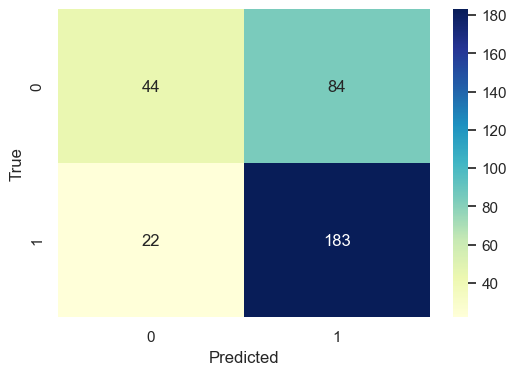

In [35]:
cm_mlp = confusion_matrix(y_test,y_predicted_mlp)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [36]:
# confusion matrix
print(classification_report(y_test, y_predicted_mlp))

              precision    recall  f1-score   support

           0       0.67      0.34      0.45       128
           1       0.69      0.89      0.78       205

    accuracy                           0.68       333
   macro avg       0.68      0.62      0.61       333
weighted avg       0.68      0.68      0.65       333



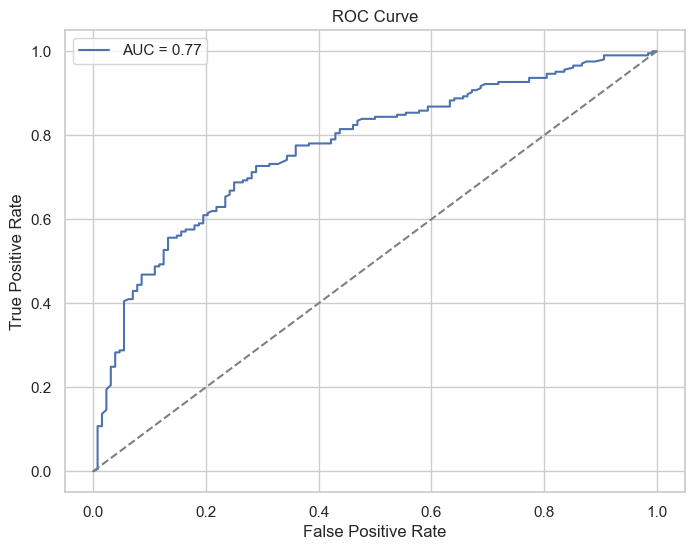

In [37]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_mlp)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs_mlp)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Misclassified Points:
 [[53.   0.5]
 [73.   4.7]
 [38.   1.6]
 [75.   1.5]
 [64.   1.5]
 [53.   1.3]
 [63.   1.4]
 [54.   1.3]
 [55.   1.8]
 [48.   1.7]
 [58.   1.7]
 [42.   1.1]
 [36.   2. ]
 [36.   0.8]
 [50.   2. ]
 [70.   2.7]
 [53.   1.1]
 [45.   2.5]
 [18.   0.4]
 [79.   1.8]
 [61.   1.6]
 [71.   2.9]
 [82.   2.1]
 [63.   2.6]
 [38.   0.7]
 [82.   7.5]
 [45.   2.5]
 [39.   0.7]
 [41.   1.2]
 [82.   3.7]
 [67.   2.6]
 [19.   1. ]
 [52.   1.1]
 [53.   1. ]
 [65.   1.9]
 [35.   0.5]
 [78.   2.6]
 [35.   0.9]
 [79.   2.7]
 [46.   1.1]
 [62.   1.8]
 [68.   1. ]
 [72.   2.6]
 [60.   1. ]
 [44.   1. ]
 [46.   1.4]
 [82.   2.1]
 [42.   1.4]
 [47.   0.7]
 [64.   2.1]
 [53.   0.8]
 [38.   1.9]
 [38.   1.3]
 [61.   3.2]
 [62.   1.7]
 [76.   2. ]
 [65.   2.1]
 [65.   1. ]
 [62.   1.8]
 [80.   4.9]
 [65.   2.9]
 [44.   1.1]
 [67.   2. ]
 [57.   1.6]
 [46.   1.5]
 [52.   1.5]
 [82.   3.1]
 [71.   2. ]
 [53.   0.8]
 [77.   3.7]
 [68.   2.1]
 [74.   2. ]
 [81.   2.7]
 [55.   1.9]
 [43.   1. ]
 [

Text(0, 0.5, 'Field Goals Made')

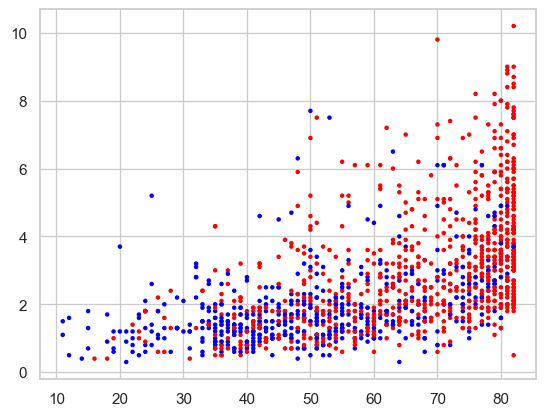

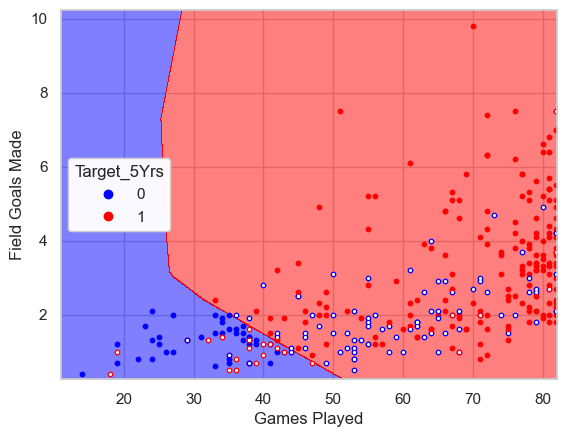

In [38]:
nm = Normalize(vmin = 0, vmax = 1)
cm = ListedColormap(['blue', 'red'])


fig0, ax0 = plt.subplots()

scatter1 = ax0.scatter(X[:, 0], X[:, 1], c=y, cmap=cm, 
    norm = nm, s = 5)

# visualise the model
fig, ax = plt.subplots()

# need to set up a mesh to plot the contour of the model
x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05

h = 0.01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
	np.arange(y_min, y_max, h))

# model predicts every point in the mesh 
# and reshapes the array for plotting
Z = mlp.predict(np.column_stack([xx.ravel(), 
	yy.ravel()]))
Z = Z.reshape(xx.shape)

# set up the color and symbol encoding
nm = Normalize(vmin = 0, vmax = 1)
cm = ListedColormap(['blue', 'red'])
m = ['o', 's']

# contour plot of the model
ax.contourf(xx, yy, Z, cmap = cm, norm = nm, alpha=0.5)

# plot the data
for i in range(len(X_test)):
	ax.scatter(X_test[i,0], X_test[i,1], 
		marker = 'o', 
		c = y_test[i], cmap = cm, norm = nm, s = 10)


# find the misclassified points
mis_ind = np.where(y_test != mlp.predict(X_test))[0]
print('Misclassified Points:\n', X_test[mis_ind], 
	y_test[mis_ind])

# plot the misclassified points
ax.scatter(X_test[mis_ind,0], X_test[mis_ind,1], 
		marker = '*', color = 'white', s = 2)


legend1 = ax.legend(*scatter1.legend_elements(),
                    loc="center left", title="Target_5Yrs")


ax.add_artist(legend1)


ax.set_xlabel('Games Played')
ax.set_ylabel('Field Goals Made')